In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

## RESULTS USING THE SIGNAL OF DONE

In [26]:
env='HalfCheetah-v4'
img_prefix =env.upper()
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data_using_done/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMCACT"
print(df_comper.shape)

(1250, 17)


In [27]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data_using_done/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
print(df_ddpg.shape)

(1250, 17)


In [28]:
df_comper.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,HalfCheetah-v4,06-10-2023 23:35:29,200,0,200,0.009941,1,201,False,-9.693225,-9.693225,-9.693225,-9.693225,-9.693225,COMCACT
1,1,2,HalfCheetah-v4,06-10-2023 23:44:07,400,0,400,0.019882,1,401,False,-80.407944,-45.050585,-45.050585,-45.050585,-45.050585,COMCACT
2,1,3,HalfCheetah-v4,06-10-2023 23:52:43,600,0,600,0.029822,1,601,False,-111.130103,-67.077091,-67.077091,-67.077091,-67.077091,COMCACT
3,1,4,HalfCheetah-v4,07-10-2023 00:01:20,800,0,800,0.039763,1,801,False,-145.728717,-86.739997,-86.739997,-86.739997,-86.739997,COMCACT
4,1,5,HalfCheetah-v4,07-10-2023 00:09:57,1000,0,1000,0.049704,1,1001,False,-158.290484,-101.050095,-101.050095,-101.050095,-101.050095,COMCACT


In [29]:
df_ddpg.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,HalfCheetah-v4,03-10-2023 15:45:15,200,201,0,0.009941,1,201,False,-81.406334,-81.406334,-81.406334,-81.406334,-81.406334,DDPG
1,1,2,HalfCheetah-v4,03-10-2023 15:45:40,400,401,0,0.019882,1,401,False,-159.207437,-120.306886,-120.306886,-120.306886,-120.306886,DDPG
2,1,3,HalfCheetah-v4,03-10-2023 15:46:05,600,601,0,0.029822,1,601,False,-202.027407,-147.547059,-147.547059,-147.547059,-147.547059,DDPG
3,1,4,HalfCheetah-v4,03-10-2023 15:46:30,800,801,0,0.039763,1,801,False,-213.923784,-164.141240,-164.141240,-164.141240,-164.141240,DDPG
4,1,5,HalfCheetah-v4,03-10-2023 15:46:56,1000,1001,0,0.049704,1,1001,False,-229.161063,-177.145205,-177.145205,-177.145205,-177.145205,DDPG


In [30]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,HalfCheetah-v4,06-10-2023 23:35:29,200,0,200,0.009941,1,201,False,-9.693225,-9.693225,-9.693225,-9.693225,-9.693225,COMCACT
1,1,2,HalfCheetah-v4,06-10-2023 23:44:07,400,0,400,0.019882,1,401,False,-80.407944,-45.050585,-45.050585,-45.050585,-45.050585,COMCACT
2,1,3,HalfCheetah-v4,06-10-2023 23:52:43,600,0,600,0.029822,1,601,False,-111.130103,-67.077091,-67.077091,-67.077091,-67.077091,COMCACT
3,1,4,HalfCheetah-v4,07-10-2023 00:01:20,800,0,800,0.039763,1,801,False,-145.728717,-86.739997,-86.739997,-86.739997,-86.739997,COMCACT
4,1,5,HalfCheetah-v4,07-10-2023 00:09:57,1000,0,1000,0.049704,1,1001,False,-158.290484,-101.050095,-101.050095,-101.050095,-101.050095,COMCACT


In [31]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
245,5,246,HalfCheetah-v4,04-10-2023 03:45:32,49200,49201,0,0.999,1,49201,False,18042.505360,3630.607957,10017.771062,13690.636063,17229.012860,DDPG
246,5,247,HalfCheetah-v4,04-10-2023 03:46:18,49400,49401,0,0.999,1,49401,False,18318.865883,3690.074588,10161.956268,13869.184445,17415.485964,DDPG
247,5,248,HalfCheetah-v4,04-10-2023 03:47:04,49600,49601,0,0.999,1,49601,False,18528.912895,3749.908614,10306.376613,14048.724315,17607.035627,DDPG
248,5,249,HalfCheetah-v4,04-10-2023 03:47:50,49800,49801,0,0.999,1,49801,False,18687.811290,3809.900191,10450.731065,14227.348471,17797.114264,DDPG
249,5,250,HalfCheetah-v4,04-10-2023 03:48:37,50000,50001,0,0.999,1,50001,True,18744.446958,3869.638378,10594.296368,14403.672450,17975.237752,DDPG


In [32]:
#fig, axs = plt.subplots(nrows=2,ncols=2)
#fig.set_figwidth(15)
#fig.set_figheight(10)
#sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
#sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
#sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
#sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])


In [33]:
path ='COMPER_DDPG/data_using_done/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMCACT"
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,07-10-2023 02:57:49,HalfCheetah-v4,5000,-1.496069,COMCACT
1,1,07-10-2023 06:19:20,HalfCheetah-v4,10000,-1.177537,COMCACT
2,1,07-10-2023 09:38:35,HalfCheetah-v4,15000,-0.774244,COMCACT
3,1,07-10-2023 13:08:41,HalfCheetah-v4,20000,-1.093843,COMCACT
4,1,07-10-2023 16:42:54,HalfCheetah-v4,25000,1.457145,COMCACT


In [34]:
df_comper_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,-1.941915
std,1.428571,14507.211437,1.652977
min,1.000000,5000.000000,-6.176585
25%,2.000000,15000.000000,-3.104901
50%,3.000000,27500.000000,-1.556742
75%,4.000000,40000.000000,-1.049423
max,5.000000,50000.000000,1.457145


In [35]:
path ='DPPG/data_using_done/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,03-10-2023 15:55:12,HalfCheetah-v4,5000,0.796193,DDPG
1,1,03-10-2023 16:06:06,HalfCheetah-v4,10000,-0.561921,DDPG
2,1,03-10-2023 16:17:57,HalfCheetah-v4,15000,0.791803,DDPG
3,1,03-10-2023 16:30:48,HalfCheetah-v4,20000,3.140119,DDPG
4,1,03-10-2023 16:44:46,HalfCheetah-v4,25000,1.242454,DDPG


In [36]:
df_ddpg_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,-1.460417
std,1.428571,14507.211437,2.074468
min,1.000000,5000.000000,-5.249884
25%,2.000000,15000.000000,-3.004640
50%,3.000000,27500.000000,-1.847497
75%,4.000000,40000.000000,0.481885
max,5.000000,50000.000000,3.140119


In [37]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])
df_eval.rename(columns = {'Int':'Itr'}, inplace = True)

<Axes: xlabel='Itr', ylabel='EvalAvgRew'>

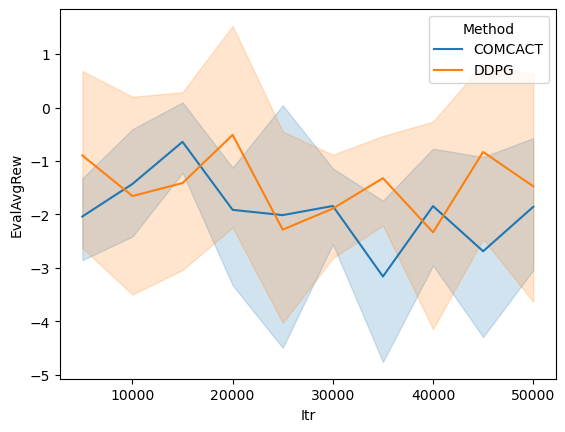

In [38]:
sns.lineplot(data=df_eval, x="Itr", y="EvalAvgRew",hue='Method')

## USING ROLLING AVERAGE

In [39]:
df_comper_rolling_avg = pd.DataFrame(df_comper[["TotalItr","EpRew","Method"]])
df_comper_rolling_avg["EpRewRolling"]=df_comper_rolling_avg['EpRew'].rolling(100).mean()
df_comper_rolling_avg.dropna(inplace=True)
df_comper_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,20000,639.857757,COMCACT,-594.145878
100,20200,703.757021,COMCACT,-587.011375
101,20400,784.182004,COMCACT,-578.365476
102,20600,891.299956,COMCACT,-568.341175
103,20800,915.606392,COMCACT,-557.727824


In [40]:
df_ddpg_rolling_avg=pd.DataFrame(df_ddpg[["TotalItr","EpRew","Method"]])
df_ddpg_rolling_avg["EpRewRolling"]=df_ddpg_rolling_avg["EpRew"].rolling(100).mean()
df_ddpg_rolling_avg.dropna(inplace=True)
df_ddpg_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,20000,-595.230257,DDPG,-1256.384321
100,20200,-556.316243,DDPG,-1261.133420
101,20400,-504.888489,DDPG,-1264.590231
102,20600,-455.368743,DDPG,-1267.123644
103,20800,-425.654081,DDPG,-1269.240947


In [41]:
df_rolling=pd.concat([df_comper_rolling_avg,df_ddpg_rolling_avg])
df_rolling.head()

,TotalItr,EpRew,Method,EpRewRolling
99,20000,639.857757,COMCACT,-594.145878
100,20200,703.757021,COMCACT,-587.011375
101,20400,784.182004,COMCACT,-578.365476
102,20600,891.299956,COMCACT,-568.341175
103,20800,915.606392,COMCACT,-557.727824


In [42]:
df_rolling.tail()

,TotalItr,EpRew,Method,EpRewRolling
245,49200,18042.505360,DDPG,10017.771062
246,49400,18318.865883,DDPG,10161.956268
247,49600,18528.912895,DDPG,10306.376613
248,49800,18687.811290,DDPG,10450.731065
249,50000,18744.446958,DDPG,10594.296368


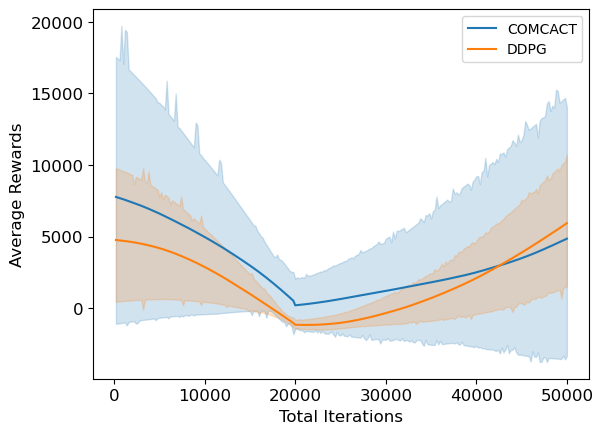

In [ ]:
fig = plt.Figure()
fig.set_figwidth(20)
fig.set_figheight(10)
sns.lineplot(data=df_rolling, x="TotalItr", y="EpRewRolling",hue='Method')
plt.xlabel(xlabel = 'Total Iterations',fontsize=12) 
plt.ylabel(ylabel='Average Rewards',fontsize=12)
plt.legend(fontsize=10)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
fig.set_dpi(300)
plt.savefig("GRAPHICS/using_done_signal/"+img_prefix+"-DONE-TRAINING.png")

In [20]:
df_comper_eval_rolling_avg = pd.DataFrame(df_comper_eval[["Int","EvalAvgRew","Method"]])
df_comper_eval_rolling_avg["EpRewRolling"]=df_comper_eval["EvalAvgRew"].rolling(2).mean()
df_comper_eval_rolling_avg.dropna(inplace=True)
df_comper_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,-1.177537,COMCACT,-1.336803
2,15000,-0.774244,COMCACT,-0.975891
3,20000,-1.093843,COMCACT,-0.934043
4,25000,1.457145,COMCACT,0.181651
5,30000,-2.003528,COMCACT,-0.273192


In [21]:
df_ddpg_eval_rolling_avg = pd.DataFrame(df_ddpg_eval[["Int","EvalAvgRew","Method"]])
df_ddpg_eval_rolling_avg["EpRewRolling"]=df_ddpg_eval["EvalAvgRew"].rolling(2).mean()
df_ddpg_eval_rolling_avg.dropna(inplace=True)
df_ddpg_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,-0.561921,DDPG,0.117136
2,15000,0.791803,DDPG,0.114941
3,20000,3.140119,DDPG,1.965961
4,25000,1.242454,DDPG,2.191286
5,30000,-0.780235,DDPG,0.231109


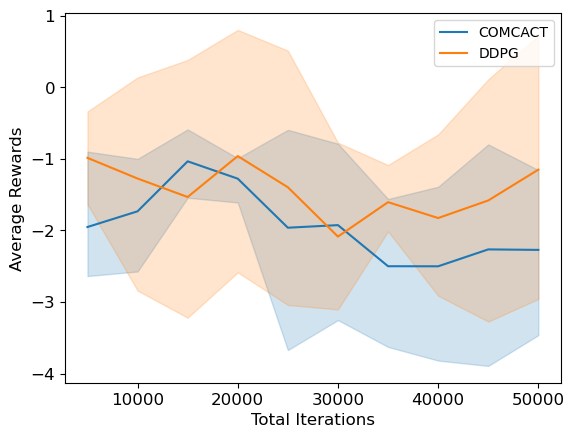

In [22]:
df_eval_rolling=pd.concat([df_comper_eval_rolling_avg,df_ddpg_eval_rolling_avg])
sns.lineplot(data=df_eval_rolling, x="Int", y="EpRewRolling",hue='Method')
plt.xlabel( xlabel = 'Total Iterations',fontsize=12) 
plt.ylabel(ylabel='Average Rewards',fontsize=12)
plt.legend(fontsize=10)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
fig.set_dpi(300)
plt.savefig("GRAPHICS/using_done_signal/"+img_prefix+"-DONE-EVALUATION.png")

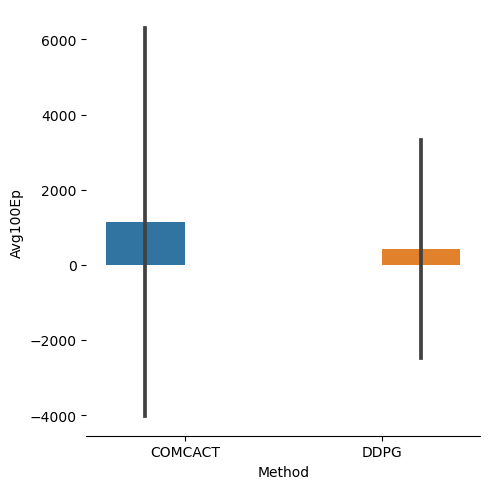

In [23]:
g = sns.catplot(data=df, kind="bar",x="Method", y="Avg100Ep", hue="Method",
    errorbar="sd")
g.despine(left=True)

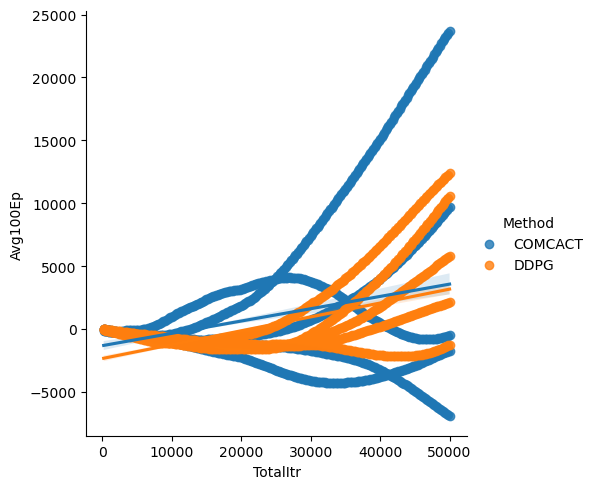

In [24]:
g = sns.lmplot(
    data=df,
    x="TotalItr", y="Avg100Ep", hue="Method",
    height=5
)